In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/week2/2020225_jason_up.dat", delimiter='\t')
df = df.set_index("T(K)")
df = df.drop("Time(Min)", axis="columns")
df.head()

,(0 Deg.)M.S.(uV),(0 Deg.)STD(uV),(90 Deg.)M.S.(uV),(90 Deg.)STD(uV)
T(K),,,,
89.1,-63.78,0.0,28.08,0.04
89.2,-63.78,0.0,28.12,0.04
89.4,-63.78,0.0,28.11,0.03
89.5,-63.78,0.0,28.14,0.02
89.6,-63.78,0.0,28.14,0.03


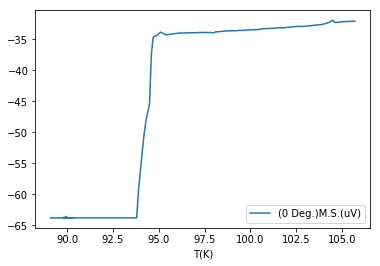

In [3]:
df.plot(None, "(0 Deg.)M.S.(uV)")

(93, 95)

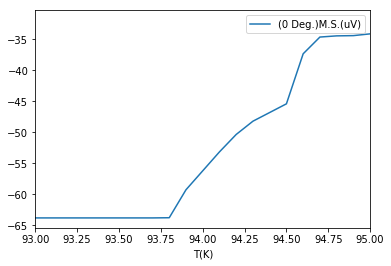

In [4]:
df.plot(None, "(0 Deg.)M.S.(uV)")
plt.xlim([93,95])

In [5]:
T_c = 94.25

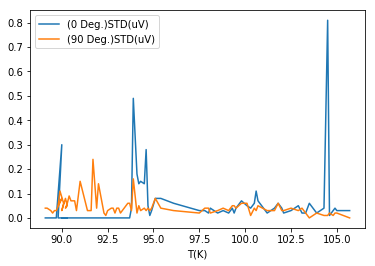

In [6]:
df.plot(None, ["(0 Deg.)STD(uV)", "(90 Deg.)STD(uV)"])

In [7]:
df["combine"] = -(df["(0 Deg.)M.S.(uV)"]**2 + df["(90 Deg.)M.S.(uV)"]**2)**0.5

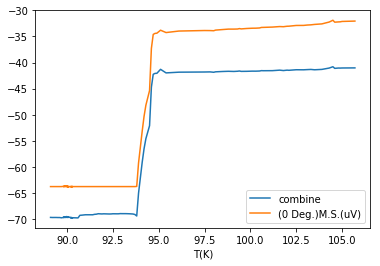

In [8]:
df.plot(None, ["combine", "(0 Deg.)M.S.(uV)"])

(-43, -40)

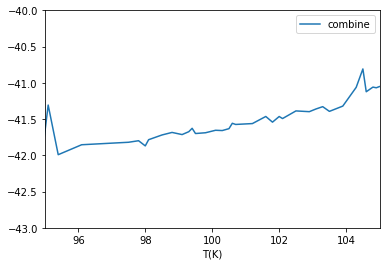

In [9]:
df.plot(None, "combine")
plt.xlim([95,105])
plt.ylim([-43, -40])

In [10]:
indices = (df.index > 95) & (df.index < 105)
values = df.iloc[indices]["combine"]
temps = values.index.values
volts = values.values

p_values = np.polyfit(temps, volts, 1)
p_func = np.poly1d(p_values)

df["fixed"] = df["combine"] - p_func(df.index.values)

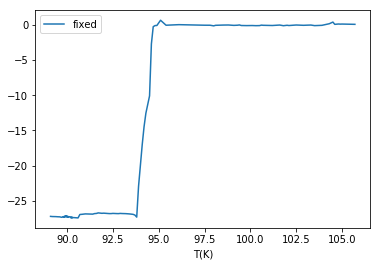

In [11]:
df.plot(None, "fixed")

In [12]:
df["ratio"] = df["fixed"] / df["fixed"].iloc[0]

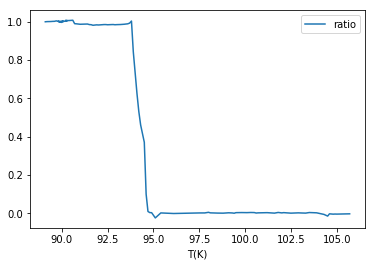

In [13]:
df.plot(None, "ratio")

In [14]:
len_0 = 3000e-10
thick = 1.3e-3 
len_func = lambda r: (thick - r*(thick-2*len_0))/2

df["depth"] = len_func(df["ratio"].values)

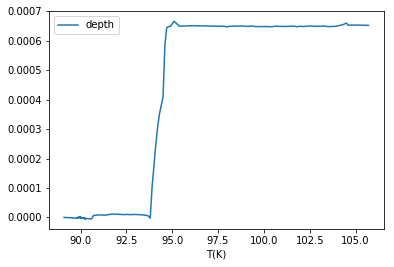

In [15]:


df.plot(None, "depth")



In [16]:
df["norm_temp"] = (T_c - df.index.values)/T_c

(0, 0.06344827586206903)

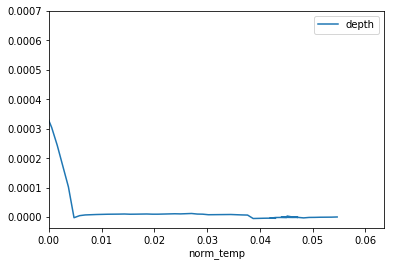

In [17]:


df.plot("norm_temp", "depth")
plt.xlim([0,None])


Text(0, 0.5, 'penetration depth')

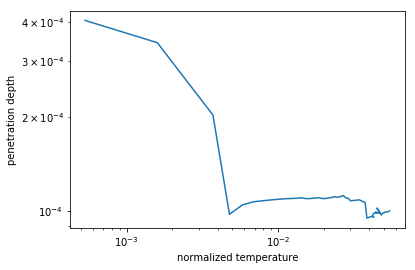

In [18]:
indices = (df["norm_temp"].values > 0)
temps = df.iloc[indices]["norm_temp"].values
depth = df.iloc[indices]["depth"].values

epsilon = 0.0001
depth += epsilon

plt.loglog(temps, depth)
plt.xlabel("normalized temperature")
plt.ylabel("penetration depth")

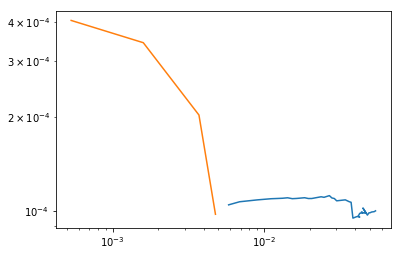

In [19]:
split = 39
plt.loglog(temps[:split], depth[:split])
plt.loglog(temps[split:], depth[split:])

[-0.06281794 -9.39628329] [ -0.56382705 -11.89504358]


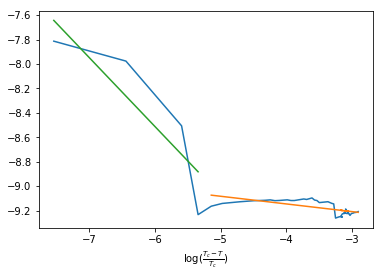

In [20]:
temps_log = np.log(temps)
depth_log = np.log(depth)

p_values1 = np.polyfit(temps_log[:split], depth_log[:split], 1)
p_func1 = np.poly1d(p_values1)

p_values2 = np.polyfit(temps_log[split:], depth_log[split:], 1)
p_func2 = np.poly1d(p_values2)

plt.plot(temps_log, depth_log)

plt.plot(temps_log[:split], p_func1(temps_log[:split]))
plt.plot(temps_log[split:], p_func2(temps_log[split:]))

plt.xlabel(r"$\log(\frac{T_c - T}{T_c})$")

print(p_values1, p_values2)

In [21]:
np.exp(-0.06)

0.9417645335842487

In [22]:
np.exp(-0.56)

0.5712090638488149